<a href="https://colab.research.google.com/github/kotatakehara/Self-efficacy/blob/draft/Kendama_every.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Nonajustment(r,B,alpha,beta,a): #難易度を調整しない場合の結果を表す関数
  dispersion = [1**2]     #被験者のやる気を表す分散を格納する配列
  p = [0]       #皿のガウス分布の平均値を格納する配列
  x = []
  for i in range(len(B)):
    x.append(i)
    D = np.random.normal(loc=p[i], scale=np.sqrt(dispersion[i]), size=1)      #皿の位置を表す変数
    if B[i] >= D-r and B[i] <= D+r:     #成功した時の分散の変化
      p.append(p[i])
      dispersion.append(dispersion[i]-alpha)
      if dispersion[i+1] < 0:     #分散が０未満になることを防ぐ
        dispersion[i+1] = 0
    else:       #失敗した時の分散の変化
      p.append(a*B[i]+(1-a)*p[i])
      dispersion.append(dispersion[i]+beta)
  x.append(len(B))
  return x,p,dispersion


In [ ]:
def Min_ajustment(r,B,alpha,beta,a): #難易度を調整した場合（半径を小さくする場合のみ）の結果を表す関数
  dispersion = [1**2]     #被験者のやる気を表す分散を格納する配列
  p = [0]       #皿のガウス分布の平均値を格納する配列
  x = []
  R = []
  R.append(r)
  for i in range(len(B)):
    x.append(i)
    R.append(r)
    D = np.random.normal(loc=p[i], scale=np.sqrt(dispersion[i]), size=1)      #皿の位置を表す変数
    if B[i] >= D-r and B[i] <= D+r:     #成功した時の分散の変化
      p.append(p[i])
      dispersion.append(dispersion[i]-alpha)
      r -= 0.5
      if r <= 0:
        r = 0.5
      if dispersion[i+1] < 0:     #分散が０未満になることを防ぐ
        dispersion[i+1] = 0
    else:       #失敗した時の分散の変化
      p.append(a*B[i]+(1-a)*p[i])
      dispersion.append(dispersion[i]+beta)
  x.append(len(B))
  return x,p,dispersion,R

In [ ]:
def Max_ajustment(r,B,alpha,beta,a): #難易度を調整した場合（半径を大きくする場合のみ）の結果を表す関数
  dispersion = [1**2]     #被験者のやる気を表す分散を格納する配列
  p = [0]       #皿のガウス分布の平均値を格納する配列
  trial = 0       #試行回数を表す変数
  x = []
  R = []
  R.append(r)
  for i in range(len(B)):
    x.append(i)
    R.append(r)
    D = np.random.normal(loc=p[i], scale=np.sqrt(dispersion[i]), size=1)      #皿の位置を表す変数
    if B[i] >= D-r and B[i] <= D+r:     #成功した時の分散の変化
      p.append(p[i])
      dispersion.append(dispersion[i]-alpha)
      if dispersion[i+1] < 0:     #分散が０未満になることを防ぐ
        dispersion[i+1] = 0
    else:       #失敗した時の分散の変化
      p.append(a*B[i]+(1-a)*p[i])
      dispersion.append(dispersion[i]+beta)
      r += 0.5
  x.append(len(B))
  return x,p,dispersion,R

In [ ]:
def Ajustment(r,B,alpha,beta,a): #難易度を調整した場合（半径を小さくしたり大きくしたり）の結果を表す関数
  dispersion = [1**2]     #被験者のやる気を表す分散を格納する配列
  p = [0]       #皿のガウス分布の平均値を格納する配列
  x = []
  R = []
  R.append(r)
  for i in range(len(B)):
    x.append(i)
    R.append(r)
    D = np.random.normal(loc=p[i], scale=np.sqrt(dispersion[i]), size=1)      #皿の位置を表す変数
    if B[i] >= D-r and B[i] <= D+r:     #成功した時の分散の変化
      p.append(p[i])
      dispersion.append(dispersion[i]-alpha)
      r -= 0.5
      if r <= 0:
        r = 0.5
      if dispersion[i+1] < 0:     #分散が０未満になることを防ぐ
        dispersion[i+1] = 0
    else:       #失敗した時の分散の変化
      p.append(a*B[i]+(1-a)*p[i])
      dispersion.append(dispersion[i]+beta)
      r += 0.5
  x.append(len(B))
  return x,p,dispersion,R

In [ ]:
alpha = 0.1       #成功した場合のやる気の変化量を表す変数
beta = 0.1    #失敗した場合のやる気の変化量を表す変数
r = 1       #皿の半径を表す変数
a = 1       #どれだけの割合皿の中心を落下地点に移動させるかを表す変数（a=1なら落下地点に移動）
B = np.random.normal(loc=0, scale=1, size=100) #けん玉の落下データを格納する配列（locは平均、scaleは標準偏差、sizeは導かれる値の数）
Non_r = []    #各半径での変化を格納すための配列
for i in range(5,35,5):
  r = i/10
  Non_x,Non_p,Non_dispersion = Nonajustment(r,B,alpha,beta,a)
  Non = [Non_x,Non_p,Non_dispersion]
  Non_r.insert(len(Non_r), Non)

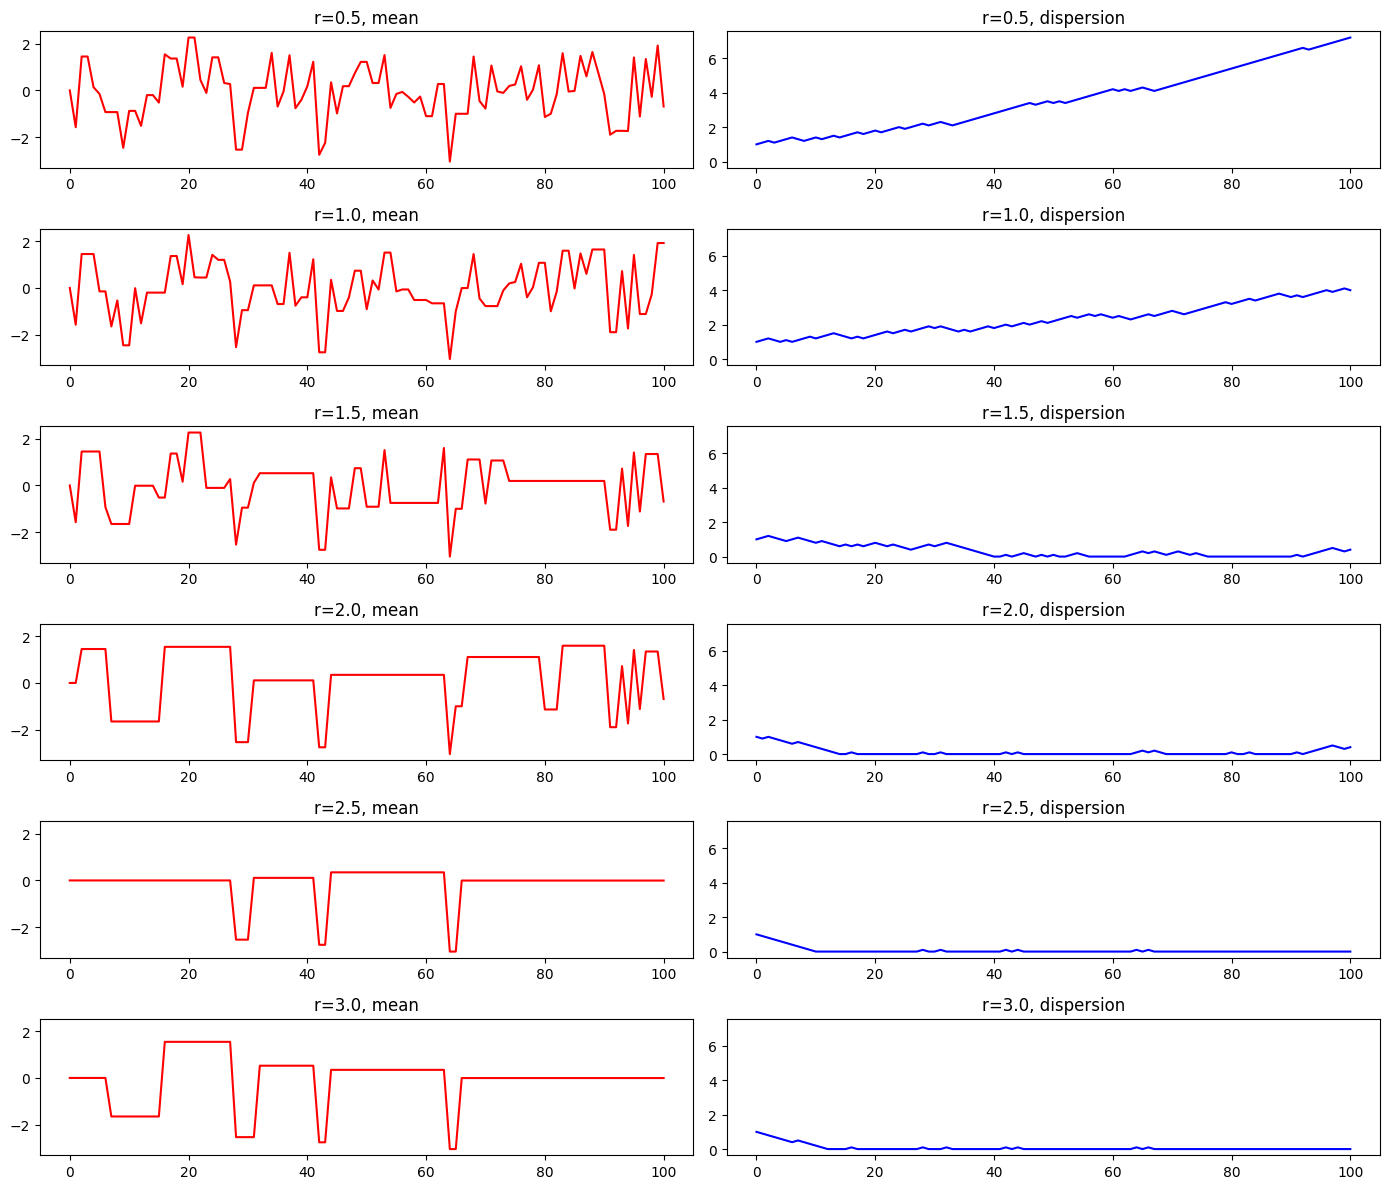

In [ ]:
#各半径の変化を描画
fig, axs = plt.subplots(len(Non_r), 2, figsize=(14, 2 * len(Non_r)), dpi=100, sharey="col")
fig.subplots_adjust(hspace=0.5)
for i in range(len(Non_r)):
  axs[i, 0].plot(Non_r[i][0], Non_r[i][1],color = 'r')
  axs[i, 1].plot(Non_r[i][0], Non_r[i][2],color = 'b')

  axs[i, 0].set_title(f"r={0.5*(i+1)}, mean")
  axs[i, 1].set_title(f"r={0.5*(i+1)}, dispersion")

plt.tight_layout()
plt.show()


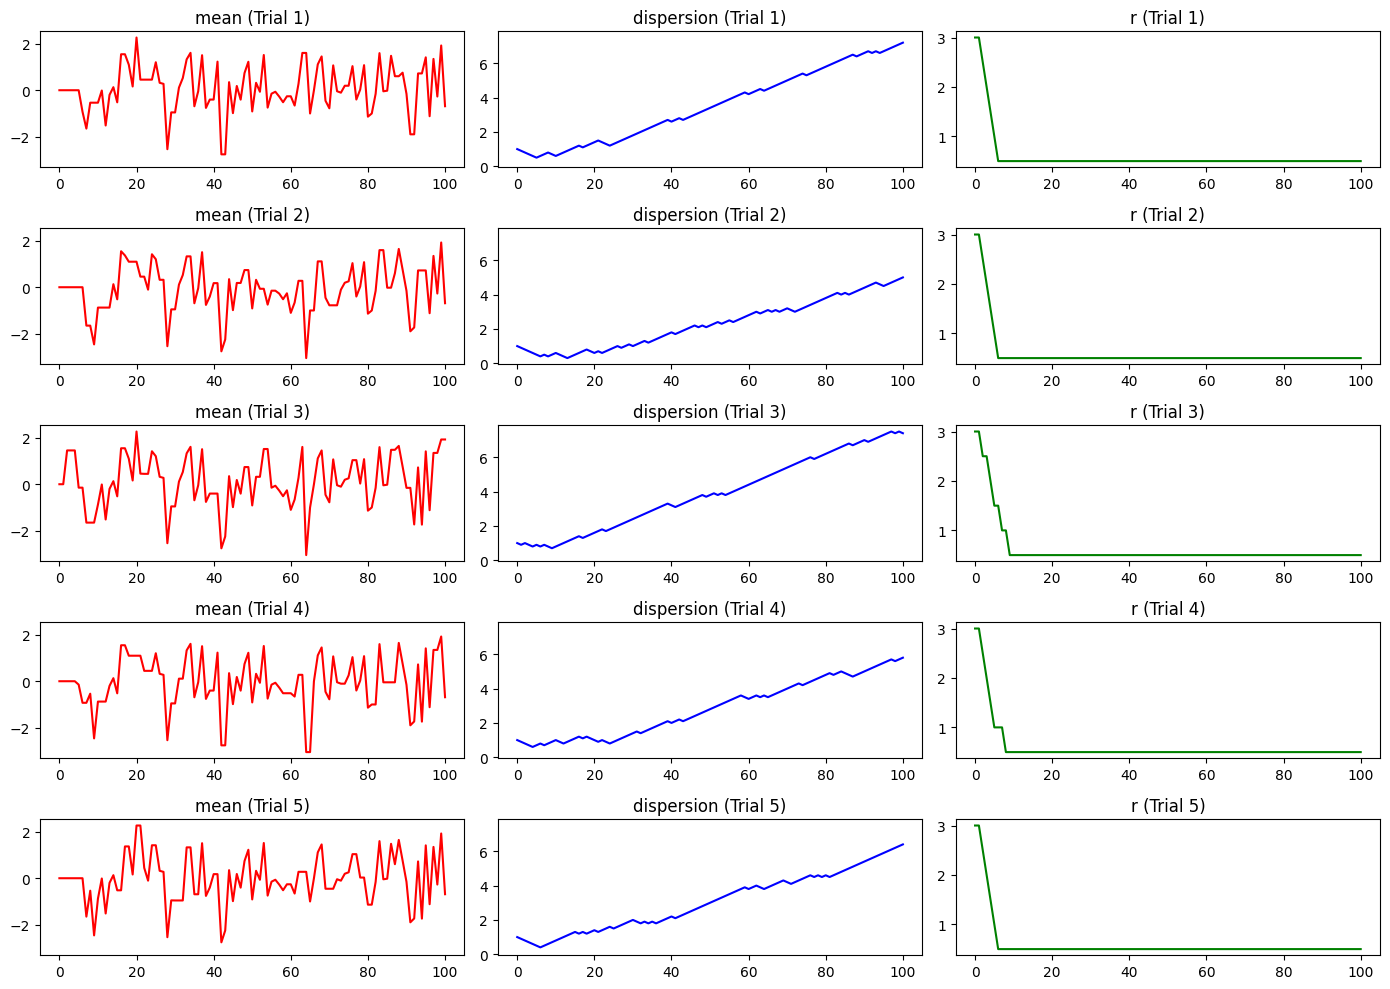

In [ ]:
# プロットするデータのリスト
data_list = []

for i in range(5):
    r = 3.0
    Yes_x, Yes_p, Yes_dispersion, R = Min_ajustment(r, B, alpha, beta, a)
    data_list.append((Yes_x, Yes_p, Yes_dispersion, R))

# サブプロットの設定
fig, axs = plt.subplots(len(data_list), 3, figsize=(14, 2* len(data_list)),sharey="col")

# グラフのプロット
for i, (Yes_x, Yes_p, Yes_dispersion, R) in enumerate(data_list):
    axs[i, 0].plot(Yes_x, Yes_p,color='r')
    axs[i, 1].plot(Yes_x, Yes_dispersion,color='b')
    axs[i, 2].plot(Yes_x, R,color='g')

    axs[i, 0].set_title(f"mean (Trial {i+1})")
    axs[i, 1].set_title(f"dispersion (Trial {i+1})")
    axs[i, 2].set_title(f"r (Trial {i+1})")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()


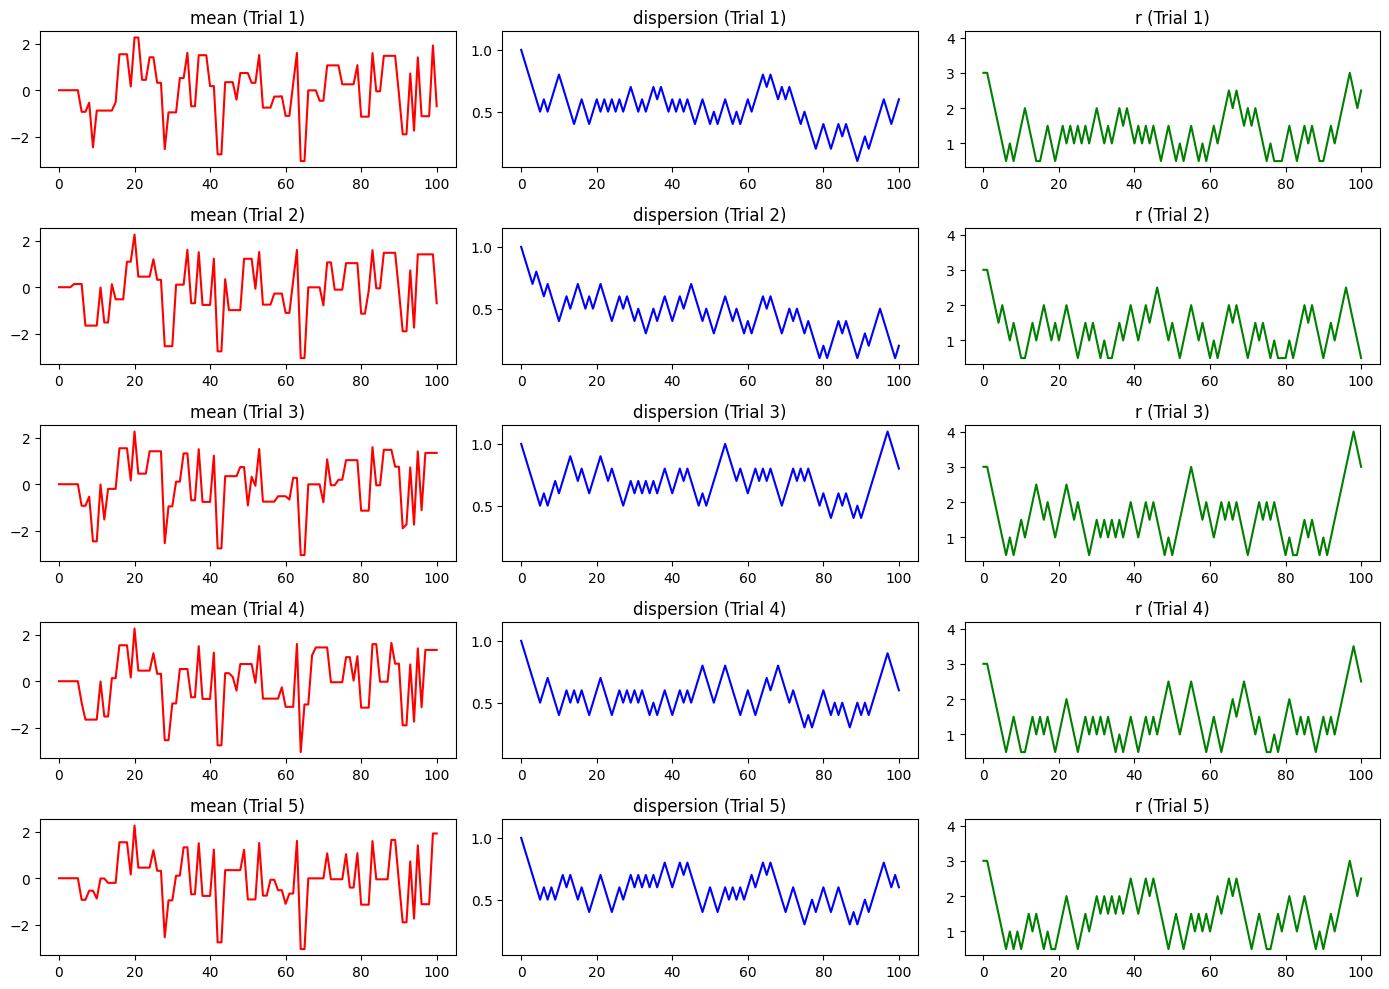

In [ ]:
# プロットするデータのリスト
A_list = []

for i in range(5):
    r = 3.0
    A_x, A_p, A_dispersion, R = Ajustment(r, B, alpha, beta, a)
    A_list.append((A_x, A_p, A_dispersion, R))

    # サブプロットの設定
fig, axs = plt.subplots(len(A_list), 3, figsize=(14, 2 * len(A_list)), sharey="col")

    # グラフのプロット
for i, (A_x, A_p, A_dispersion, R) in enumerate(A_list):
    axs[i, 0].plot(A_x, A_p, color='r')
    axs[i, 1].plot(A_x, A_dispersion, color='b')
    axs[i, 2].plot(A_x, R, color='g')

    axs[i, 0].set_title(f"mean (Trial {i+1})")
    axs[i, 1].set_title(f"dispersion (Trial {i+1})")
    axs[i, 2].set_title(f"r (Trial {i+1})")

plt.tight_layout()
plt.show()

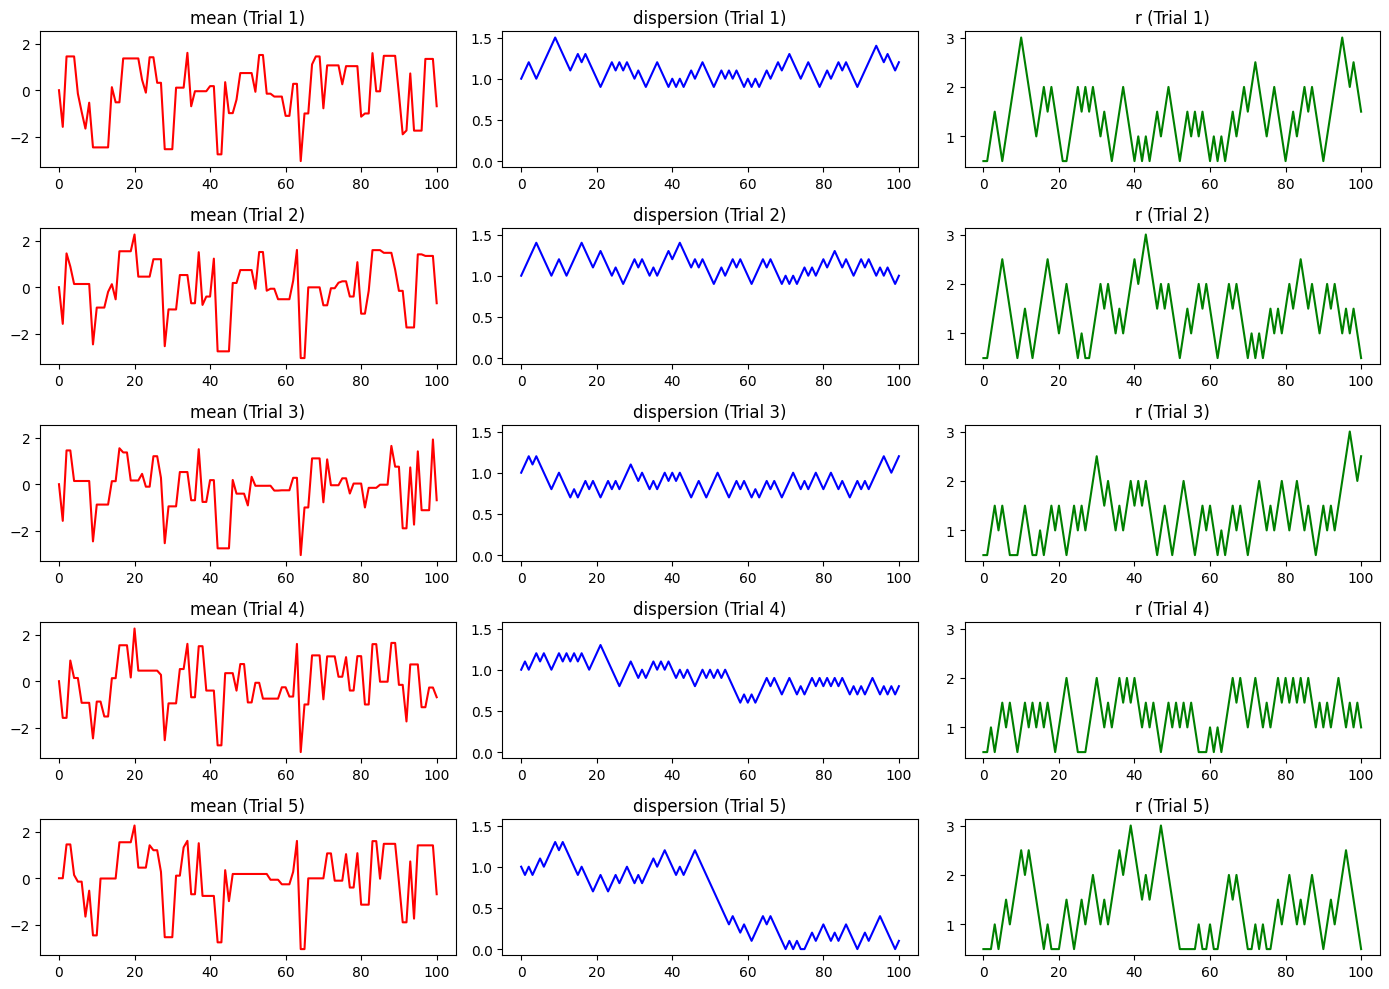

In [ ]:
# プロットするデータのリスト
A_min_list = []

for i in range(5):
    r = 0.5
    A_min_x, A_min_p, A_min_dispersion, R_min = Ajustment(r, B, alpha, beta, a)
    A_min_list.append((A_min_x, A_min_p, A_min_dispersion, R_min))

# サブプロットの設定
fig, axs = plt.subplots(len(A_min_list), 3, figsize=(14, 2* len(A_min_list)),sharey="col")

# グラフのプロット
for i, (A_min_x, A_min_p, A_min_dispersion, R_min) in enumerate(A_min_list):
    axs[i, 0].plot(A_min_x, A_min_p,color='r')
    axs[i, 1].plot(A_min_x, A_min_dispersion,color='b')
    axs[i, 2].plot(A_min_x, R_min,color='g')

    axs[i, 0].set_title(f"mean (Trial {i+1})")
    axs[i, 1].set_title(f"dispersion (Trial {i+1})")
    axs[i, 2].set_title(f"r (Trial {i+1})")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()

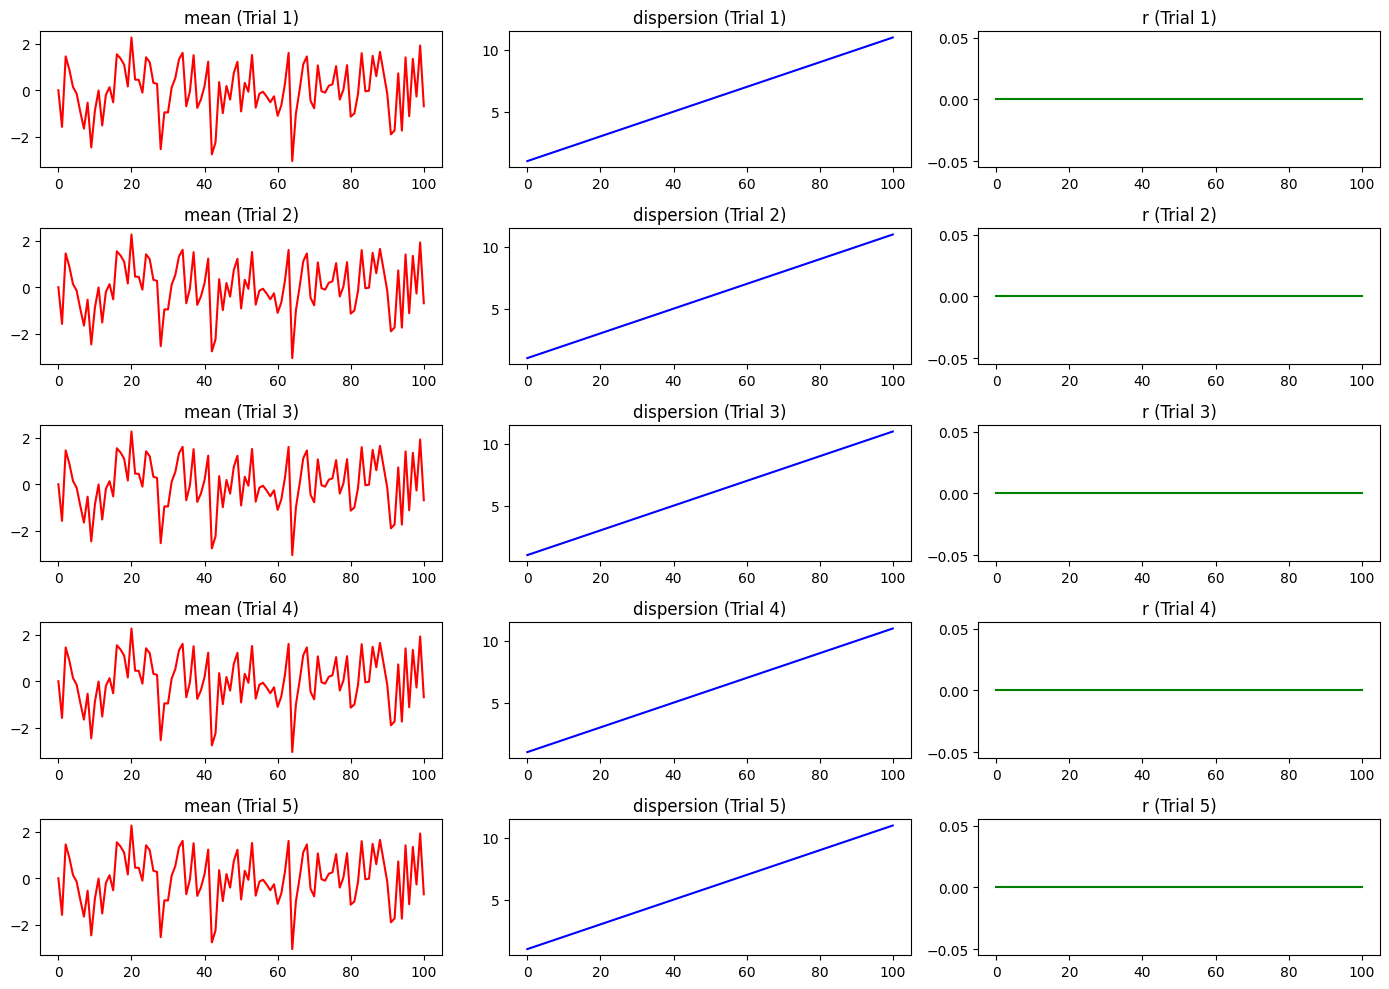

In [ ]:
# プロットするデータのリスト
data = []

for i in range(5):
    r = 0
    Yes_x, Yes_p, Yes_dispersion, R = Min_ajustment(r, B, alpha, beta, a)
    data.append((Yes_x, Yes_p, Yes_dispersion, R))

# サブプロットの設定
fig, axs = plt.subplots(len(data), 3, figsize=(14, 2* len(data)),sharey="col")

# グラフのプロット
for i, (Yes_x, Yes_p, Yes_dispersion, R) in enumerate(data):
    axs[i, 0].plot(Yes_x, Yes_p,color='r')
    axs[i, 1].plot(Yes_x, Yes_dispersion,color='b')
    axs[i, 2].plot(Yes_x, R,color='g')

    axs[i, 0].set_title(f"mean (Trial {i+1})")
    axs[i, 1].set_title(f"dispersion (Trial {i+1})")
    axs[i, 2].set_title(f"r (Trial {i+1})")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()

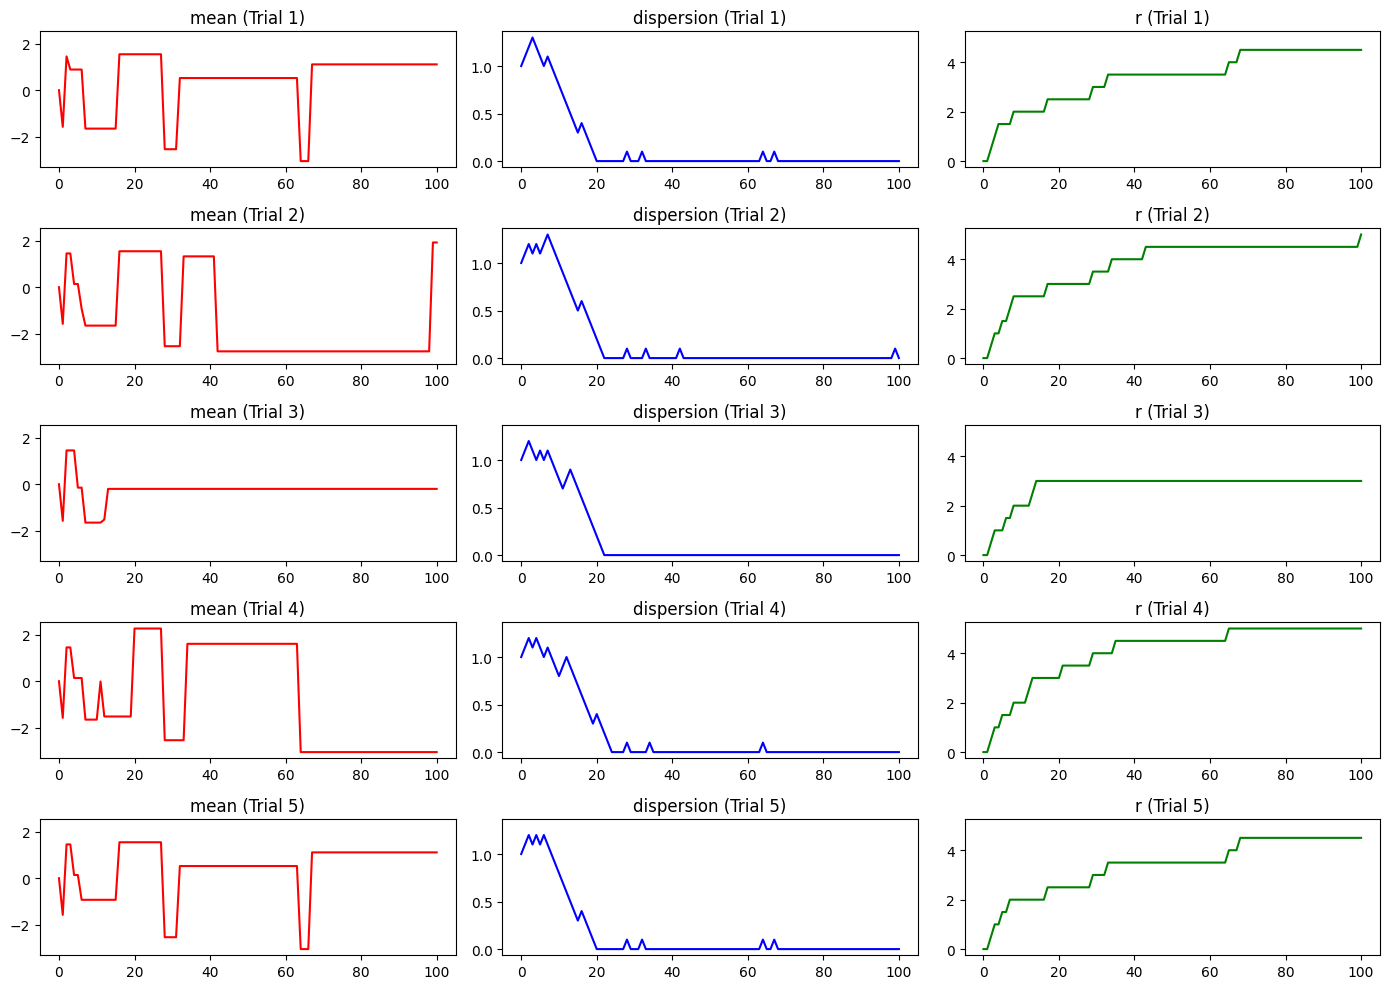

In [ ]:
# プロットするデータのリスト
Max_data = []

for i in range(5):
    r = 0
    max_x, max_p, max_dispersion, max_R = Max_ajustment(r, B, alpha, beta, a)
    Max_data.append((max_x, max_p, max_dispersion, max_R))

# サブプロットの設定
fig, axs = plt.subplots(len(Max_data), 3, figsize=(14, 2* len(Max_data)),sharey="col")

# グラフのプロット
for i, (max_x, max_p, max_dispersion, max_R) in enumerate(Max_data):
    axs[i, 0].plot(max_x, max_p,color='r')
    axs[i, 1].plot(max_x, max_dispersion,color='b')
    axs[i, 2].plot(max_x, max_R,color='g')

    axs[i, 0].set_title(f"mean (Trial {i+1})")
    axs[i, 1].set_title(f"dispersion (Trial {i+1})")
    axs[i, 2].set_title(f"r (Trial {i+1})")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()

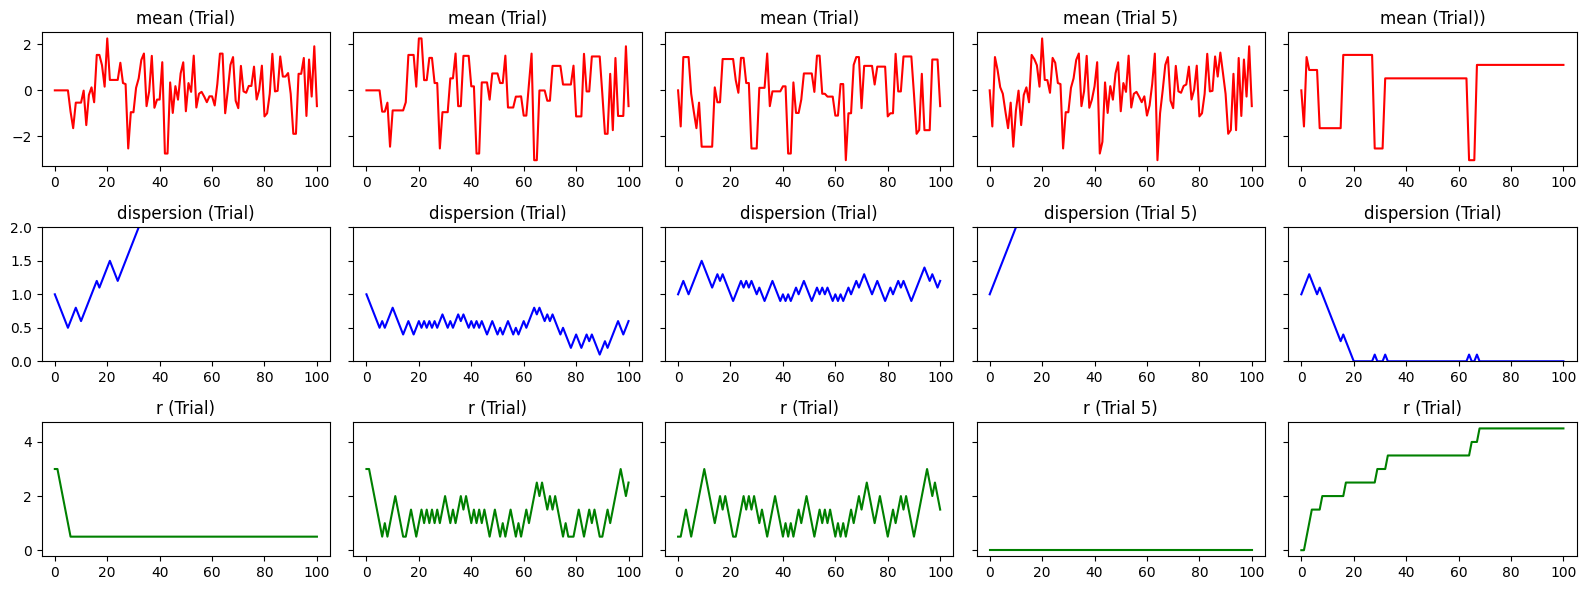

In [ ]:
# サブプロットの設定
fig, axs = plt.subplots(3, 5, figsize=(16, 2* 3),sharey="row")

axs[0, 0].plot(data_list[0][0], data_list[0][1],color='r')
axs[1, 0].plot(data_list[0][0], data_list[0][2],color='b')
axs[1, 0].set_ylim(0,2)
axs[2, 0].plot(data_list[0][0], data_list[0][3],color='g')
axs[0, 0].set_title(f"mean (Trial)")
axs[1, 0].set_title(f"dispersion (Trial)")
axs[2, 0].set_title(f"r (Trial)")

# グラフのプロット
axs[0, 1].plot(A_list[0][0], A_list[0][1],color='r')
axs[1, 1].plot(A_list[0][0], A_list[0][2],color='b')
axs[2, 1].plot(A_list[0][0], A_list[0][3],color='g')
axs[0, 1].set_title(f"mean (Trial)")
axs[1, 1].set_title(f"dispersion (Trial)")
axs[2, 1].set_title(f"r (Trial)")

# グラフのプロット
axs[0, 2].plot(A_min_list[0][0], A_min_list[0][1],color='r')
axs[1, 2].plot(A_min_list[0][0], A_min_list[0][2],color='b')
axs[2, 2].plot(A_min_list[0][0], A_min_list[0][3],color='g')
axs[0, 2].set_title(f"mean (Trial)")
axs[1, 2].set_title(f"dispersion (Trial)")
axs[2, 2].set_title(f"r (Trial)")

axs[0, 3].plot(data[0][0], data[0][1],color='r')
axs[1, 3].plot(data[0][0], data[0][2],color='b')
axs[2, 3].plot(data[0][0], data[0][3],color='g')
axs[0, 3].set_title(f"mean (Trial {i+1})")
axs[1, 3].set_title(f"dispersion (Trial {i+1})")
axs[2, 3].set_title(f"r (Trial {i+1})")

axs[0, 4].plot(Max_data[0][0], Max_data[0][1],color='r')
axs[1, 4].plot(Max_data[0][0], Max_data[0][2],color='b')
axs[2, 4].plot(Max_data[0][0], Max_data[0][3],color='g')

axs[0, 4].set_title(f"mean (Trial))")
axs[1, 4].set_title(f"dispersion (Trial)")
axs[2, 4].set_title(f"r (Trial)")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()
